In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

In [ ]:
data = pd.read_csv("listing_dates_cleaned.csv")

In [ ]:
data["list_date"] = pd.to_datetime(data["list_date"], format="%Y-%M-%d")
data["sale_date"] = pd.to_datetime(data["sale_date"], format="%Y-%M-%d")

In [ ]:
data["current_status"].value_counts()

Sale           331537
Withdrawn       48375
Active          33218
Expired         22163
Pending         15960
Other             711
Foreclosure       316
For Rent          123
Pending,           95
Cancelled          86
LOT                70
Coming Soon         6
Name: current_status, dtype: int64

In [ ]:
data_sale = data[data["current_status"] == "Sale"]

In [ ]:
# data_2016 = data[data["list_date"].dt.year <= 2016]
# data_2017 = data[data["list_date"].dt.year == 2017]
# data_2018 = data[data["list_date"].dt.year == 2018]
# data_2019 = data[data["list_date"].dt.year == 2019]
# data_2020 = data[data["list_date"].dt.year == 2020]

sale_length = data_sale["sale_date"].dt.day - data_sale["list_date"].dt.day
sale_length.value_counts()

 0     23860
 4     13193
 5     12688
 3     12345
 2     11800
       ...  
-27     1043
-28      876
-29      505
 30      445
-30      160
Length: 61, dtype: int64

In [ ]:
data["property_id"].value_counts() # multiple transactions for each house?

140225693    4
582900564    4
139587827    4
139595795    4
321367640    4
            ..
13454746     1
138222926    1
507669762    1
13788419     1
459276288    1
Name: property_id, Length: 412470, dtype: int64

In [ ]:
data[data["property_id"] == 140225693]

,property_id,zipcode,latitude,longitude,list_date,sale_date,withdrawn_date,expired_date,cancelled_date,current_status,list_price,sale_price
3787,140225693,80521,40.58611,-105.10459,2016-01-09 00:03:00,2016-01-29 00:04:00,NaN,NaN,NaN,Sale,450000.0,498750.0
111330,140225693,80521,40.58611,-105.10459,2017-01-13 00:06:00,2017-01-14 00:07:00,NaN,NaN,NaN,Sale,550000.0,525000.0
180974,140225693,80521,40.58611,-105.10459,2018-01-13 00:06:00,NaT,NaN,2018-10-31,NaN,Expired,605000.0,NaN
307807,140225693,80521,40.58611,-105.10459,2019-01-24 00:09:00,2019-01-27 00:12:00,NaN,NaN,NaN,Sale,575000.0,546000.0


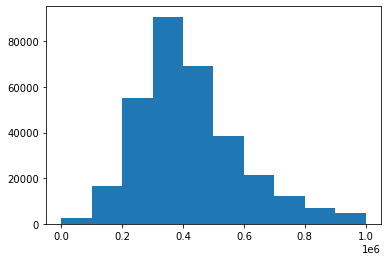

In [ ]:
plt.hist(data_sale[data_sale["sale_price"] < 1000000]["sale_price"])
plt.show()

In [ ]:
denver_map = gpd.read_file("county_boundary.shp")

geometry = [Point(xy) for xy in zip(data_sale['longitude'], data_sale['latitude'])]

geo_df = gpd.GeoDataFrame(data_sale,
 crs = {'init': 'epsg:4326'},
 geometry = geometry)

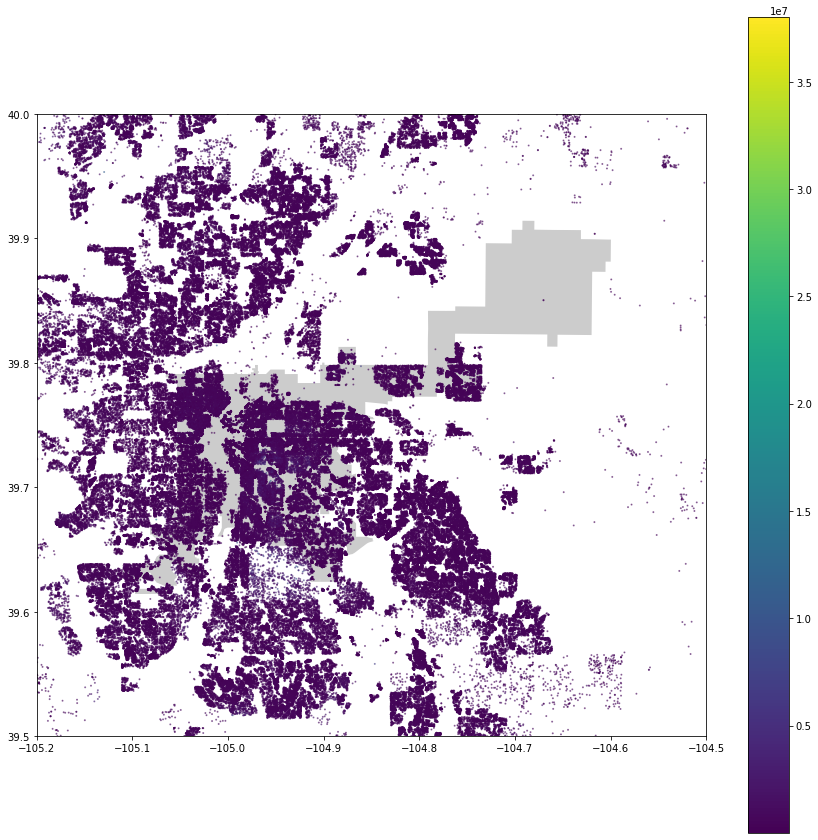

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))

denver_map.plot(ax=ax, alpha=0.4, color='grey')
geo_df.plot(column='list_price', ax=ax, alpha=0.5, legend=True ,markersize=1)

plt.xlim(-105.2,-104.5)
plt.ylim(39.5,40)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1c850c61-d934-4c85-b16d-3cb283df0c84' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>